In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

import warnings; warnings.simplefilter('ignore')

In [2]:
Applications = pd.read_csv("Datasets/Applications.csv")
Applications.head()

,L_id,Application_date,H_id
0,736,13/12/2020,12
1,445,26/06/2021,694
2,343,09/12/2020,54
3,855,07/04/2021,387
4,9,15/08/2020,371


In [3]:
L_SME = pd.read_csv("Datasets/L_SME.csv")
L_SME.head()

,L_id,Company Name,Sector,Location,No. of employees being laid off,Years in the industry
0,1,Shuffledrive,Engineering,Pune,26,8
1,2,Rhybox,Automotive Repair,Nashik,41,20
2,3,Eazzy,Automotive Repair,Nashik,59,9
3,4,Jatri,Health and beauty,Thane,56,18
4,5,Divanoodle,Retail,Nashik,30,9


In [4]:
H_SME = pd.read_csv("Datasets/H_SME.csv")
H_SME.head()

,H_id,Company Name,Sector,Location,No. of employees required,Years in the industry,Ready to help?,Start date,End date
0,1,Rhybox,Engineering,Nagpur,26,5,No,14/04/2020,14/10/2020
1,2,Dazzlesphere,Health and beauty,Thane,43,7,Yes,27/01/2021,15/05/2020
2,3,Youtags,Food and restaurant,Nashik,25,2,Yes,01/01/2021,24/07/2021
3,4,Browsedrive,Automotive Repair,Nagpur,54,7,No,03/05/2021,19/06/2020
4,5,Eare,Retail,Nashik,30,11,Yes,05/06/2020,26/05/2020


In [5]:
### check the custom list created in mockaroo. nashik and nagpur should be higher

In [6]:
Citywise_openings = H_SME.groupby(['Location']).size().reset_index(name='Locationwise').sort_values('Locationwise',
                                                                             ascending=False).head()

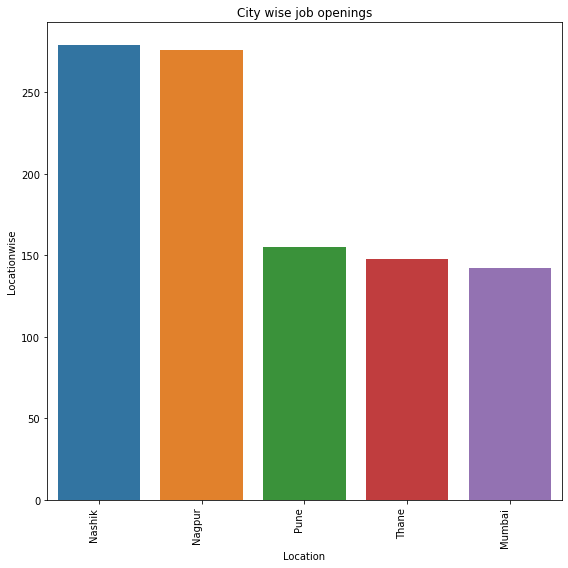

In [7]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x="Location", y="Locationwise", data=Citywise_openings)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('City wise job openings')
plt.tight_layout()
plt.show()

In [8]:
L_SMES_city_wise = L_SME.groupby(['Location']).size().reset_index(
    name='Locationwise').sort_values('Locationwise',ascending=False)

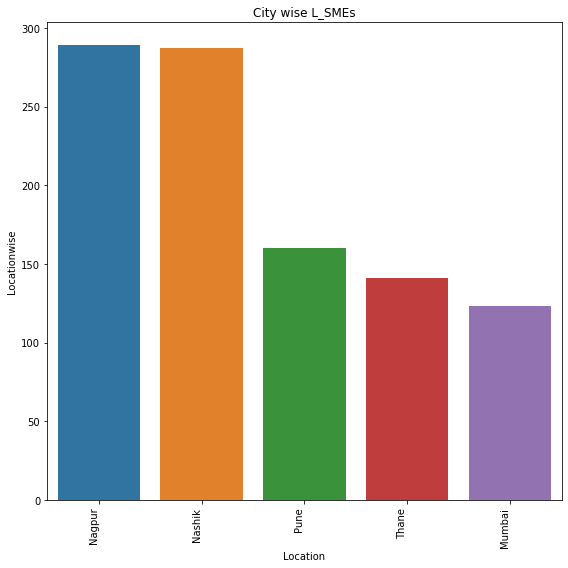

In [9]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x="Location", y="Locationwise",data=L_SMES_city_wise.head(50))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('City wise L_SMEs')
plt.tight_layout()
plt.show()

### Best approach
Find out similar users -- Find out for which jobs they have applied -- suggest those job to the other users who shared similar user profile.
We are finding put similar user profile based on their degree type, majors and total years of experience.

We will get to 10 similar users.
We will find our which are the jobs for which these users have applied
We take an union of these jobs and recommend the jobs all these user base

##### USERBASED

In [10]:
user_based_approach = L_SME

In [11]:
user_based_approach['Location'] = user_based_approach['Location'] + user_based_approach['Sector'] + str(user_based_approach['No. of employees being laid off'])

In [12]:
user_based_approach.head()

,L_id,Company Name,Sector,Location,No. of employees being laid off,Years in the industry
0,1,Shuffledrive,Engineering,PuneEngineering0 26\n1 41\n2 59...,26,8
1,2,Rhybox,Automotive Repair,NashikAutomotive Repair0 26\n1 41\n2...,41,20
2,3,Eazzy,Automotive Repair,NashikAutomotive Repair0 26\n1 41\n2...,59,9
3,4,Jatri,Health and beauty,ThaneHealth and beauty0 26\n1 41\n2 ...,56,18
4,5,Divanoodle,Retail,NashikRetail0 26\n1 41\n2 59\n3...,30,9


In [13]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(user_based_approach['Location'])

In [14]:
tfidf_matrix.shape

(1000, 107)

In [15]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [16]:
cosine_sim[0]

array([1.        , 0.4905172 , 0.4905172 , 0.42680053, 0.53338745,
       0.47771962, 0.43515573, 0.48854921, 0.44633115, 0.465503  ,
       1.        , 0.50994521, 0.53338745, 0.51453262, 0.44666566,
       0.4905172 , 0.48854921, 0.48351455, 0.43538772, 0.44666566,
       0.49958476, 0.43538772, 0.53419261, 0.50994521, 0.47130053,
       0.51453262, 0.51453262, 0.49958476, 0.53338745, 0.42150195,
       0.465503  , 0.48854921, 0.47130053, 0.47130053, 0.42680053,
       0.53419261, 0.53338745, 0.47130053, 0.49958476, 0.51453262,
       0.48854921, 0.43538772, 0.47771962, 0.43538772, 0.4905172 ,
       0.46409871, 0.44666566, 0.48854921, 0.49958476, 0.53419261,
       0.50994521, 0.53338745, 0.49519496, 0.44633115, 0.47130053,
       0.51453262, 0.53338745, 0.45702903, 0.53419261, 0.53338745,
       0.43538772, 0.41129437, 0.4905172 , 0.43788849, 0.49519496,
       0.47130053, 0.53419261, 0.47130053, 0.43788849, 0.49519496,
       0.50994521, 0.47771962, 0.4905172 , 0.44633115, 0.49958

In [17]:
user_based_approach = user_based_approach.reset_index()
userid = user_based_approach['L_id']
indices = pd.Series(user_based_approach.index, index=user_based_approach['L_id'])

In [18]:
def get_recommendations_userwise(userid):
    idx = indices[userid]
    #print (idx)
    sim_scores = list(enumerate(cosine_sim[idx]))
    #print (sim_scores)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    user_indices = [i[0] for i in sim_scores]
    #print (user_indices)
    return user_indices[0:11]

In [19]:
print (" Top 10 Similar users with userId: 23 ")
get_recommendations_userwise(23)

 Top 10 Similar users with userId: 23 


[22, 35, 49, 58, 66, 97, 109, 128, 167, 177, 186]

In [20]:
get_recommendations_userwise(146)

[18, 21, 41, 43, 60, 78, 134, 145, 155, 164, 182]

In [21]:
get_recommendations_userwise(2)

[1, 2, 15, 44, 62, 72, 79, 86, 106, 112, 113]

In [22]:
L_SME

,L_id,Company Name,Sector,Location,No. of employees being laid off,Years in the industry
0,1,Shuffledrive,Engineering,PuneEngineering0 26\n1 41\n2 59...,26,8
1,2,Rhybox,Automotive Repair,NashikAutomotive Repair0 26\n1 41\n2...,41,20
2,3,Eazzy,Automotive Repair,NashikAutomotive Repair0 26\n1 41\n2...,59,9
3,4,Jatri,Health and beauty,ThaneHealth and beauty0 26\n1 41\n2 ...,56,18
4,5,Divanoodle,Retail,NashikRetail0 26\n1 41\n2 59\n3...,30,9
...,...,...,...,...,...,...
995,996,Trudeo,Health and beauty,NashikHealth and beauty0 26\n1 41\n2...,54,13
996,997,Trudeo,Automotive Repair,MumbaiAutomotive Repair0 26\n1 41\n2...,52,2
997,998,Yadel,Retail,NagpurRetail0 26\n1 41\n2 59\n3...,91,11
998,999,Innojam,Automotive Repair,NagpurAutomotive Repair0 26\n1 41\n2...,62,2


In [23]:
def get_job_id(usrid_list):
    jobs_userwise = Applications['L_id'].isin(usrid_list) 
    df1 = pd.DataFrame(data = Applications[jobs_userwise], columns=['H_id'])
    joblist = df1['H_id'].tolist()
    Job_list = H_SME['H_id'].isin(joblist) 
    df_temp = pd.DataFrame(data = H_SME[Job_list], columns=['H_id','Company Name','Sector','Location','Start date','End date','No. of employees required'])
    return df_temp

In [24]:
H_SME.head()

,H_id,Company Name,Sector,Location,No. of employees required,Years in the industry,Ready to help?,Start date,End date
0,1,Rhybox,Engineering,Nagpur,26,5,No,14/04/2020,14/10/2020
1,2,Dazzlesphere,Health and beauty,Thane,43,7,Yes,27/01/2021,15/05/2020
2,3,Youtags,Food and restaurant,Nashik,25,2,Yes,01/01/2021,24/07/2021
3,4,Browsedrive,Automotive Repair,Nagpur,54,7,No,03/05/2021,19/06/2020
4,5,Eare,Retail,Nashik,30,11,Yes,05/06/2020,26/05/2020


In [25]:
get_job_id(get_recommendations_userwise(466))

,H_id,Company Name,Sector,Location,Start date,End date,No. of employees required
185,186,Miboo,Fabrication,Pune,14/07/2020,25/02/2021,35
979,980,Zoozzy,Food and restaurant,Nashik,05/04/2021,02/07/2021,55


In [26]:
L_SME[L_SME['L_id'] > 465]

,L_id,Company Name,Sector,Location,No. of employees being laid off,Years in the industry
465,466,Shufflebeat,Health and beauty,NagpurHealth and beauty0 26\n1 41\n2...,58,20
466,467,Zoovu,Food and restaurant,ThaneFood and restaurant0 26\n1 41\n...,90,11
467,468,Meevee,Engineering,PuneEngineering0 26\n1 41\n2 59...,66,3
468,469,Skipfire,Engineering,MumbaiEngineering0 26\n1 41\n2 ...,73,19
469,470,Kwimbee,Retail,PuneRetail0 26\n1 41\n2 59\n3 ...,86,12
...,...,...,...,...,...,...
995,996,Trudeo,Health and beauty,NashikHealth and beauty0 26\n1 41\n2...,54,13
996,997,Trudeo,Automotive Repair,MumbaiAutomotive Repair0 26\n1 41\n2...,52,2
997,998,Yadel,Retail,NagpurRetail0 26\n1 41\n2 59\n3...,91,11
998,999,Innojam,Automotive Repair,NagpurAutomotive Repair0 26\n1 41\n2...,62,2


In [27]:
L_SME

,L_id,Company Name,Sector,Location,No. of employees being laid off,Years in the industry
0,1,Shuffledrive,Engineering,PuneEngineering0 26\n1 41\n2 59...,26,8
1,2,Rhybox,Automotive Repair,NashikAutomotive Repair0 26\n1 41\n2...,41,20
2,3,Eazzy,Automotive Repair,NashikAutomotive Repair0 26\n1 41\n2...,59,9
3,4,Jatri,Health and beauty,ThaneHealth and beauty0 26\n1 41\n2 ...,56,18
4,5,Divanoodle,Retail,NashikRetail0 26\n1 41\n2 59\n3...,30,9
...,...,...,...,...,...,...
995,996,Trudeo,Health and beauty,NashikHealth and beauty0 26\n1 41\n2...,54,13
996,997,Trudeo,Automotive Repair,MumbaiAutomotive Repair0 26\n1 41\n2...,52,2
997,998,Yadel,Retail,NagpurRetail0 26\n1 41\n2 59\n3...,91,11
998,999,Innojam,Automotive Repair,NagpurAutomotive Repair0 26\n1 41\n2...,62,2


In [28]:
get_job_id(get_recommendations_userwise(786))

,H_id,Company Name,Sector,Location,Start date,End date,No. of employees required
295,296,Tambee,Engineering,Pune,10/03/2021,11/04/2021,28
719,720,Riffpath,Fabrication,Mumbai,09/04/2020,20/06/2021,70


In [29]:
import pickle

In [30]:
with open('Final_model', 'wb') as f:
    pickle.dump(get_job_id,f)
    pickle.dump(get_recommendations_userwise,f)

In [31]:
with open('Final_model','rb') as f:
    rs = pickle.load(f)
    su = pickle.load(f)

In [32]:
rs(su(466))

,H_id,Company Name,Sector,Location,Start date,End date,No. of employees required
185,186,Miboo,Fabrication,Pune,14/07/2020,25/02/2021,35
979,980,Zoozzy,Food and restaurant,Nashik,05/04/2021,02/07/2021,55
